In [3]:
#-------------------------- import packages --------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#-------------------------- generate data features --------------------------
np.random.seed(0)
num_vars = 20 # number of variables to generate
num_samples = 100_000 # number of observations
cat_vars = {"X7": 3, "X8": 10, "X10": 10} # name and number of categories
variables = {}
for i in range(1, num_vars + 1):
    
    # continuous variables
    if f"X{i}" not in cat_vars.keys():
        variables[f'X{i}'] = np.random.randn(num_samples)
    
    # categorical variables
    else:
        variables[f'X{i}'] = np.random.randint(0, cat_vars[f"X{i}"], num_samples)

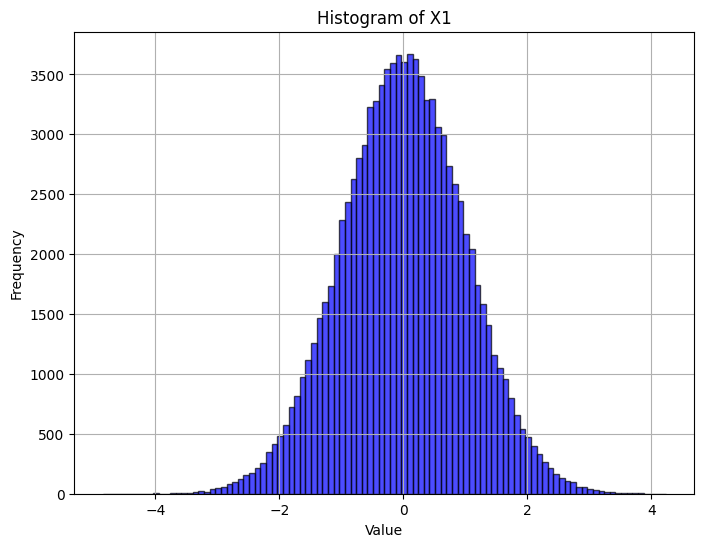

In [5]:
#-------------------------- check X1 --------------------------
plt.figure(figsize = (8, 6))
plt.hist(variables["X1"], bins = 100, color = 'blue', alpha = 0.7, edgecolor = 'black')
plt.title('Histogram of X1')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

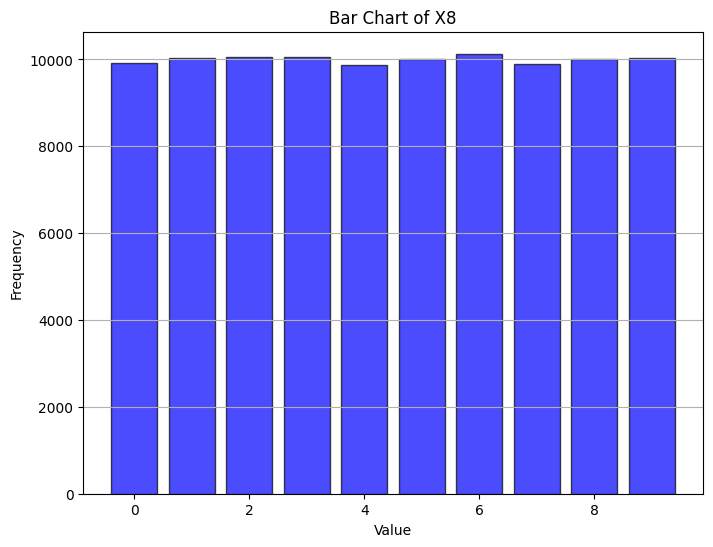

In [6]:
#-------------------------- check X8 --------------------------
# Get the distinct values and their frequencies
values, counts = np.unique(variables["X8"], return_counts=True)

# Create a bar chart to show the frequencies of X8
plt.figure(figsize=(8, 6))
plt.bar(values, counts, color='blue', alpha=0.7, edgecolor='black')

# Add titles and labels
plt.title('Bar Chart of X8')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True, axis='y')  # Add gridlines along the y-axis
plt.show()

In [7]:
#-------------------------- define functions to calculate main and pairwise interaction effect --------------------------

# main effect
def main_effect(var_name, var_values):
    if var_name == "X1":
        return 0.25 * var_values
    elif var_name == "X2":
        return 0.25 * np.exp(-var_values) / (1 + var_values**2)
    elif var_name == "X3":
        return -0.125 * var_values**2
    elif var_name == "X4":
        return 0.25 * np.abs(var_values) * np.sin(2 * var_values)
    elif var_name == "X5":
        return 0.5 * (2 * np.sin(2 * var_values)**3 - np.cos(var_values) + 0.2 * var_values**2 - 2)
    elif var_name == "X6":
        return 0.125 * np.cos(3 * var_values)
    elif var_name == "X7":
        return np.where(var_values == 0, 1, np.where(var_values == 1, -2, 0.25))
    elif var_name == "X8":
        return np.where(var_values == 0, -0.25, np.where(var_values == 1, 0.25, 0))

# pairwise interaction
def interaction_effect(var_name, var1, var2):
    if var_name == "f16":
        return 0.125 * var1 * np.exp(-0.25 * var2)
    elif var_name == "f34":
        return 0.25*np.sin(np.pi * var1 * var2)
    elif var_name == "f35":
        return 2 * np.exp(-2 * (var1 / 3)**2 - 0.5 * (2 * var2**2 + 12 * (var1 / 3)**2 - 5)**2)
    elif var_name == "f89":
        return np.where(var1 == 2, 0.25 * np.tanh(var2), np.where(var1 == 3, -0.25 * np.tanh(var2), 0))

### Main Effects:

1. $ f_1(X_1) $:
$$
f_1(X_1) = \frac{1}{4} X_1
$$

2. $ f_2(X_2) $:
$$
f_2(X_2) = \frac{1}{4}\frac{e^{-X_2}}{1 + X_2^2}
$$

3. $ f_3(X_3) $:
$$
f_3(X_3) = -\frac{1}{8} X_3^2
$$

4. $ f_4(X_4) $:
$$
f_4(X_4) = \frac{1}{4} |X_4| \sin(2X_4)
$$

5. $ f_5(X_5) $:
$$
f_5(X_5) = \frac{1}{2} \left( 2 \sin^3(2X_5) - \cos(X_5) + 0.2 X_5^2 - 2 \right)
$$

6. $ f_6(X_6) $:
$$
f_6(X_6) = \frac{1}{8} \cos(3X_6)
$$

7. $ f_7(X_7) $:
$$
f_7(X_7) = 
\begin{cases} 
1 & \text{if } X_7 = 0 \\
-2 & \text{if } X_7 = 1 \\
\frac{1}{4} & \text{otherwise}
\end{cases}
$$

8. $ f_8(X_8) $:
$$
f_8(X_8) = 
\begin{cases} 
-\frac{1}{4} & \text{if } X_8 = 0 \\
\frac{1}{4} & \text{if } X_8 = 1 \\
0 & \text{otherwise}
\end{cases}
$$



### Pairwise Interaction Effects:

1. $ f_{16}(X_1, X_6) $:
$$
f_{16}(X_1, X_6) = \frac{1}{8} X_1 e^{-0.25 X_6}
$$

2. $ f_{34}(X_3, X_4) $:
$$
f_{34}(X_3, X_4) = \frac{1}{4}\sin(\pi X_3 X_4)
$$

3. $ f_{35}(X_3, X_5) $:
$$
f_{35}(X_3, X_5) = 2 \exp\left( -2 \left( \frac{X_3}{3} \right)^2 - 0.5 \left( 2 X_5^2 + 12 \left( \frac{X_3}{3} \right)^2 - 5 \right)^2 \right)
$$

4. $ f_{89}(X_8, X_9) $:
$$
f_{89}(X_8, X_9) = 
\begin{cases} 
\frac{1}{4}\tanh(X_9) & \text{if } X_8 = 2 \\
-\frac{1}{4} \tanh(X_9) & \text{if } X_8 = 3 \\
0 & \text{otherwise}
\end{cases}
$$


In [8]:
#-------------------------- generate mean response --------------------------
effect = {}

# Main effects
for i in range(1, 9):
    effect[f"f{i}"] = main_effect(f"X{i}", variables[f"X{i}"])

# Interaction effects
effect["f16"] = interaction_effect("f16", variables["X1"], variables["X6"])
effect["f34"] = interaction_effect("f34", variables["X3"], variables["X4"])
effect["f35"] = interaction_effect("f35", variables["X3"], variables["X5"])
effect["f89"] = interaction_effect("f89", variables["X8"], variables["X9"])

# Calculate mu - the log of the mean response
mu = 8 + sum(effect.values())

Text(0.5, 1.0, 'Distribution of Log(E(Y|X))')

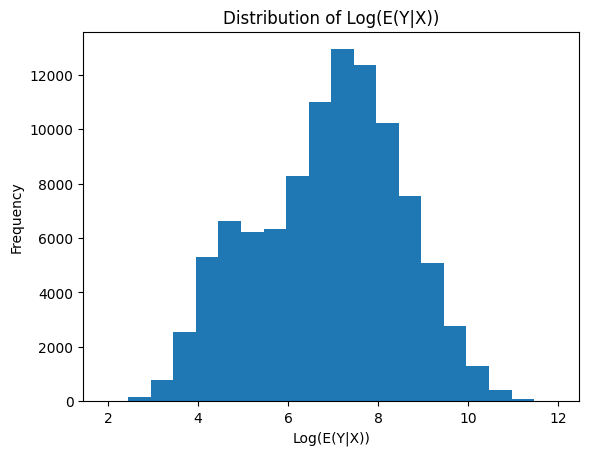

In [9]:
#-------------------------- mean response distribution --------------------------
plt.hist(mu, bins = 20)
plt.xlabel("Log(E(Y|X))")
plt.ylabel("Frequency")
plt.title("Distribution of Log(E(Y|X))")

In [10]:
#-------------------------- check min/mean/max of mu --------------------------
print(f"Min of mu: {np.min(mu)}")
print(f"Mean of mu: {np.mean(mu)}")
print(f"Max of mu: {np.max(mu)}")

Min of mu: 1.944422255058786
Mean of mu: 6.903569246090998
Max of mu: 11.973275118355495


In [11]:
#-------------------------- check min/mean/max of exp(mu) --------------------------
print(f"Min of exp(mu): {np.exp(np.min(mu))}")
print(f"Mean of exp(mu): {np.exp(np.mean(mu))}")
print(f"Max of exp(mu): {np.exp(np.max(mu))}")

Min of exp(mu): 6.989592486582712
Mean of exp(mu): 995.8227163321079
Max of exp(mu): 158462.79586695897


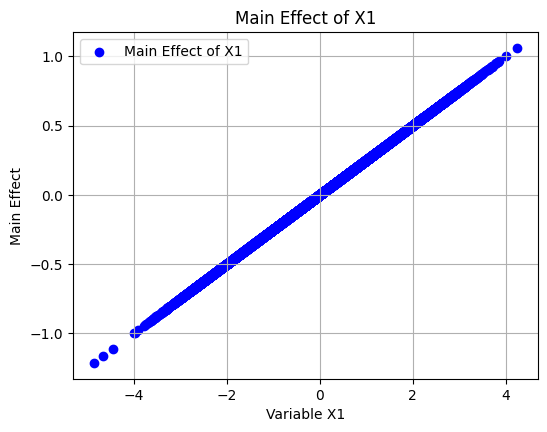

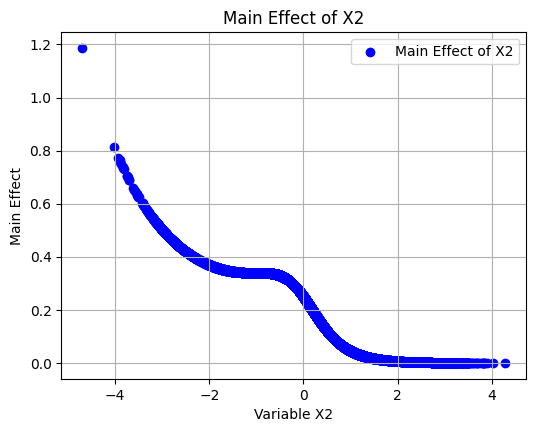

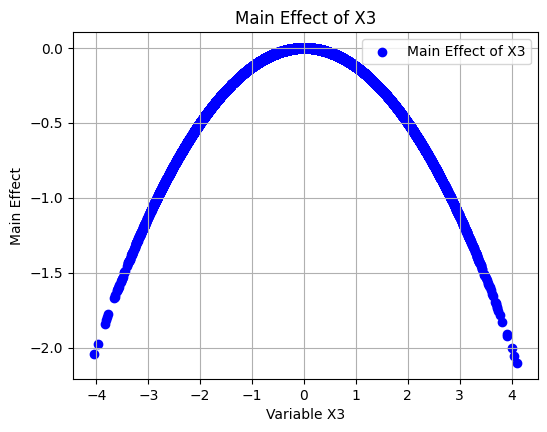

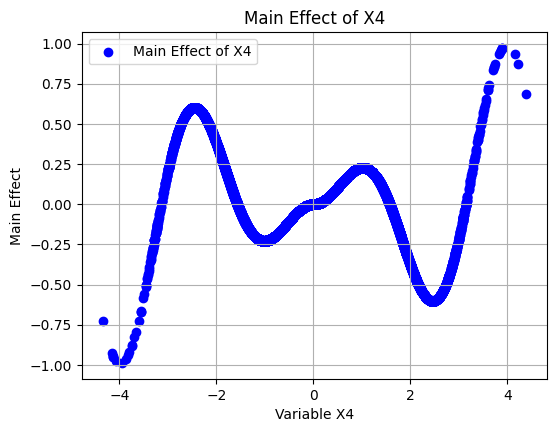

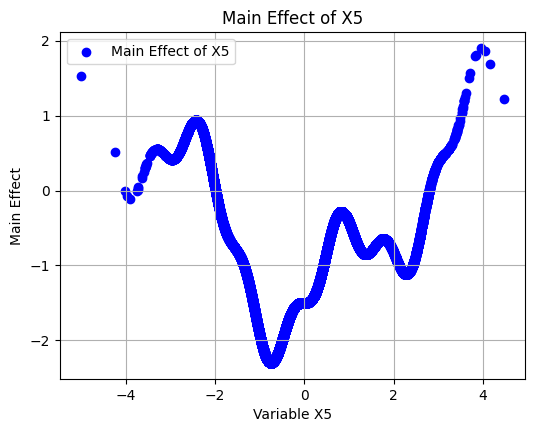

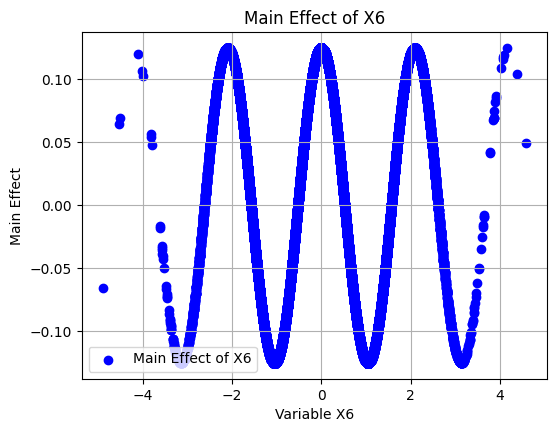

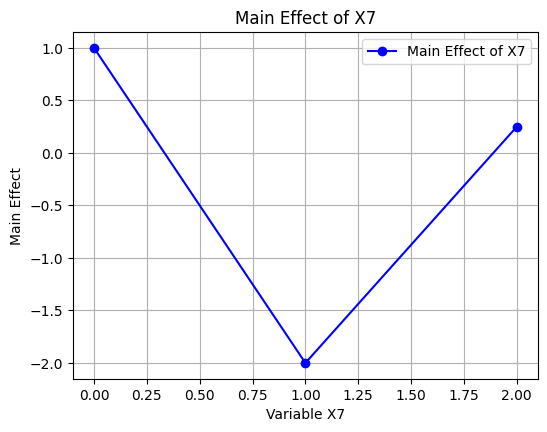

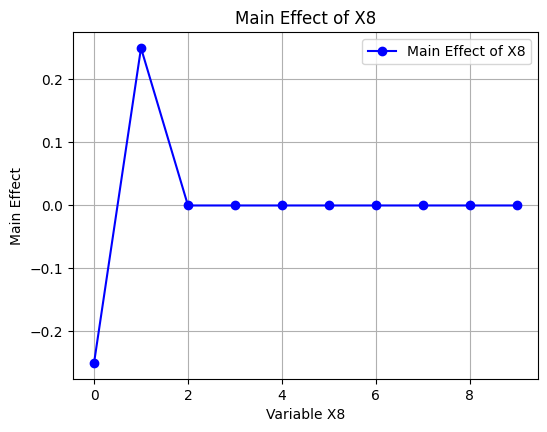

In [12]:
#-------------------------- plot functions for main effect --------------------------
for i in range(1,len(variables) + 1):
    
    if i <= 8:
        var = f"X{i}"
        values = variables[var]  # get the values for the current variable
        
        # Calculate the main effect
        effect = main_effect(var, values)
        
        # Create the plot
        plt.figure(figsize=(6, 4.5))
        
        # Check if the variable is categorical (X7 or X8), use line plot
        if var in ["X7", "X8"]:
            unique_vals = np.unique(values)
            mean_effects = [np.mean(effect[values == val]) for val in unique_vals]
            plt.plot(unique_vals, mean_effects, marker='o', color='blue', label=f'Main Effect of {var}', linestyle='-')
        else:
            plt.scatter(values, effect, color='blue', label=f'Main Effect of {var}')
        
        # Add labels and title
        plt.xlabel(f'Variable {var}')
        plt.ylabel('Main Effect')
        plt.title(f'Main Effect of {var}')
        plt.legend()
        plt.grid(True)
        
        # Show the plot
        plt.show()

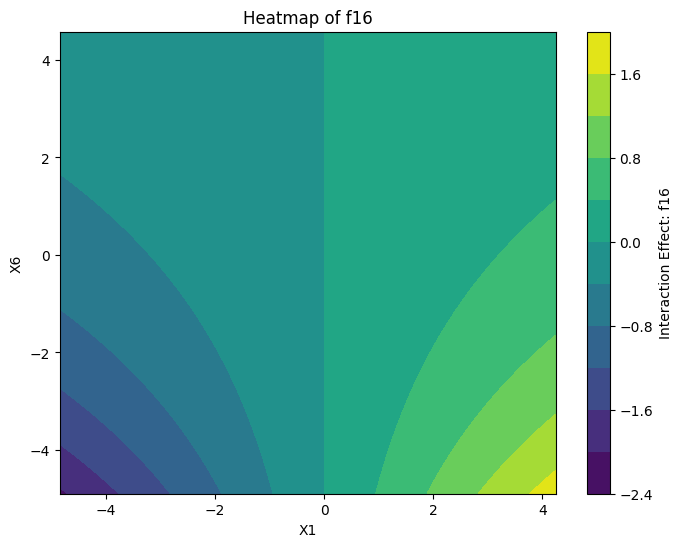

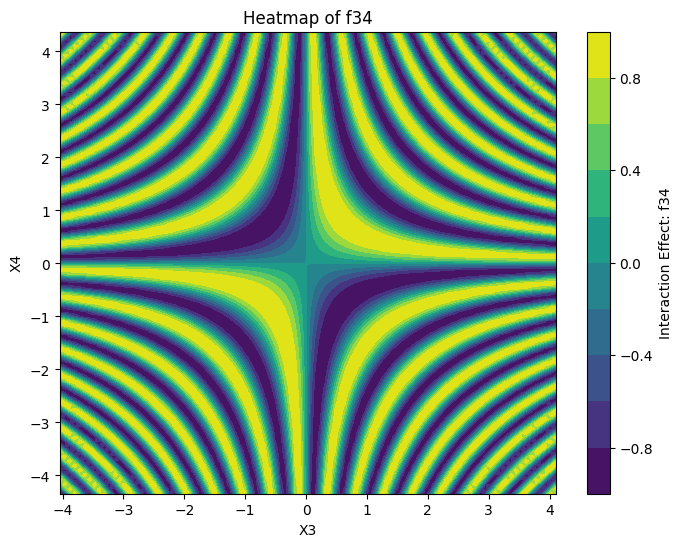

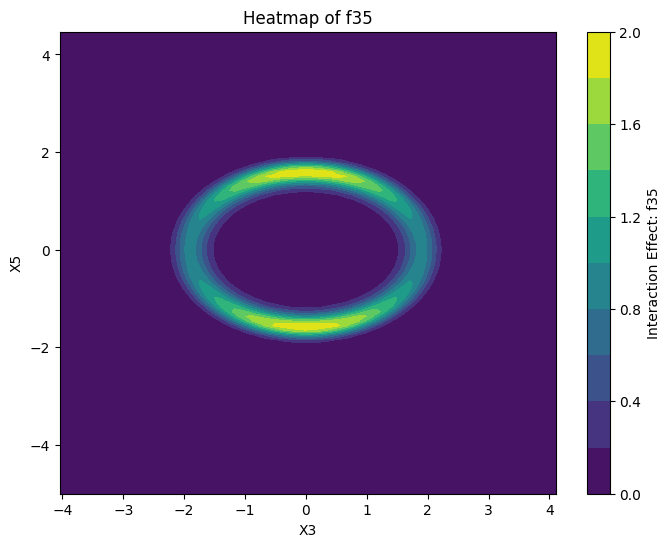

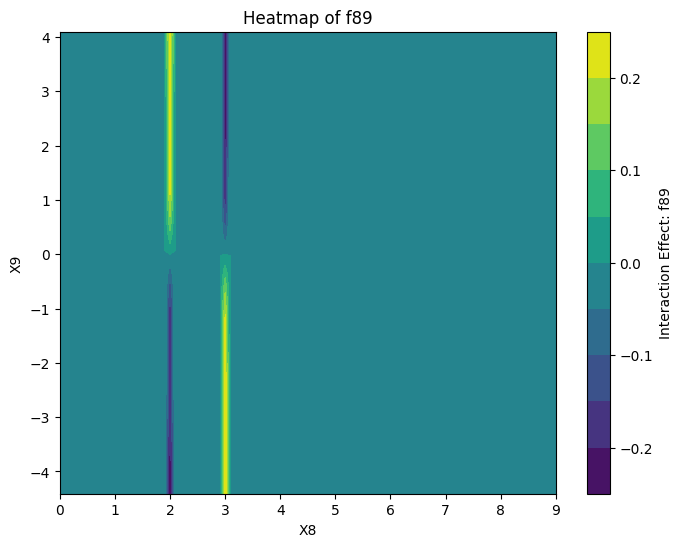

In [67]:
#-------------------------- plot the pairwise interaction effect --------------------------
# Interaction plots for f16, f34, f35, and f89
interaction_pairs = {
    "f16": ("X1", "X6"),
    "f34": ("X3", "X4"),
    "f35": ("X3", "X5"),
    "f89": ("X8", "X9")
}

# Loop through each interaction effect and plot the heatmap
for interaction, (var1, var2) in interaction_pairs.items():
    x1 = variables[var1]
    x2 = variables[var2]
    
    # Create a meshgrid for plotting
    X1, X2 = np.meshgrid(np.linspace(x1.min(), x1.max(), 100), np.linspace(x2.min(), x2.max(), 100))
    
    # Calculate the interaction effect using the defined function
    if interaction == "f16":
        Y = 0.125 * X1 * np.exp(-0.25 * X2)
    elif interaction == "f34":
        Y = np.sin(np.pi * X1 * X2)
    elif interaction == "f35":
        Y = 2 * np.exp(-2 * (X1 / 3)**2 - 0.5 * (2 * X2**2 + 12 * (X1 / 3)**2 - 5)**2)
    elif interaction == "f89":
        Y = np.where(X1 == 2, 0.25 * np.tanh(X2), np.where(X1 == 3, -0.25 * np.tanh(X2), 0))

    # Create the heatmap
    plt.figure(figsize=(8, 6))
    plt.contourf(X1, X2, Y, levels=10)
    plt.colorbar(label=f'Interaction Effect: {interaction}')
    plt.title(f'Heatmap of {interaction}')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.show()

In [243]:
#-------------------------- generate target variables --------------------------

data = pd.DataFrame(variables)

'assume a Gamma distribution with mean = exp(mu)'
phi_low = 1 # dispersion for low variance distribution
phi_high = 4 # dispersion for low variance distribution

# for low variance
response_low = np.random.gamma(shape = 1/phi_low, scale = phi_low*np.exp(mu))
data_low = data.copy()
data_low["Y"] = response_low

# for high variance
response_high = np.random.gamma(shape = 1/phi_high, scale = phi_high*np.exp(mu))
data_high = data.copy()
data_high["Y"] = response_high

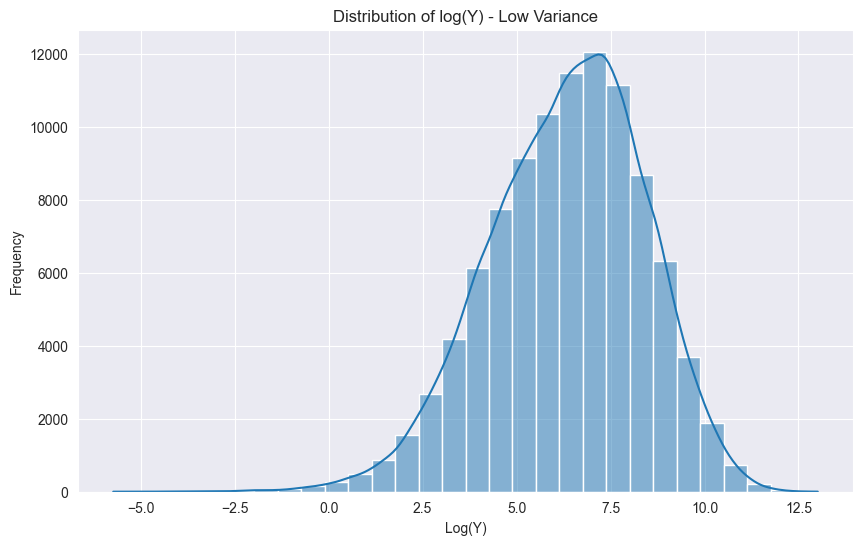

In [250]:
#-------------------------- distribution of log(response) - low variance --------------------------
plt.figure(figsize = (10, 6)) # set the size of the figure
sns.set_style("darkgrid")
sns.histplot(np.log(data_low['Y']), bins = 30, kde = True) # draw the chart
plt.title('Distribution of log(Y) - Low Variance')
plt.xlabel('Log(Y)')
plt.ylabel('Frequency')
plt.tick_params(axis = 'x')
plt.tick_params(axis = 'y')
plt.grid(True)
plt.show()

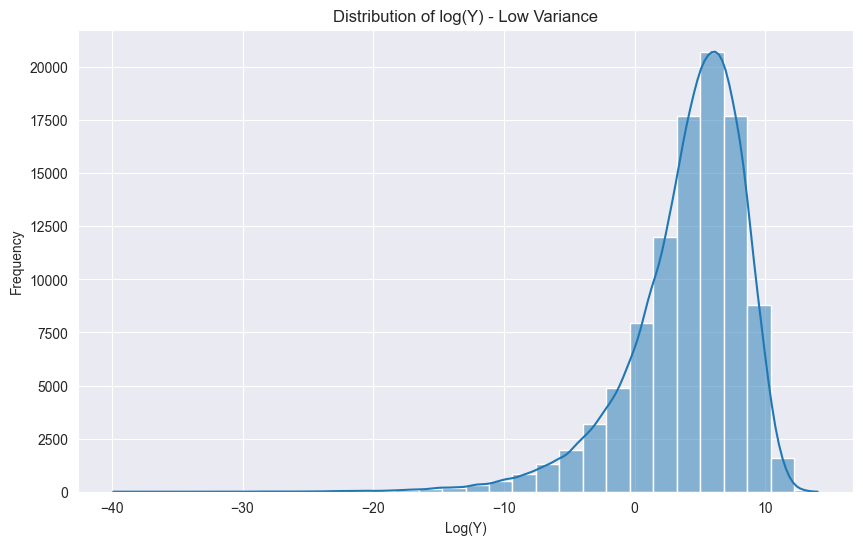

In [251]:
#-------------------------- distribution of log(response) - high variance --------------------------
plt.figure(figsize = (10, 6)) # set the size of the figure
sns.set_style("darkgrid")
sns.histplot(np.log(data_high['Y']), bins = 30, kde = True) # draw the chart
plt.title('Distribution of log(Y) - Low Variance')
plt.xlabel('Log(Y)')
plt.ylabel('Frequency')
plt.tick_params(axis = 'x')
plt.tick_params(axis = 'y')
plt.grid(True)
plt.show()

In [249]:
#-------------------------- export data --------------------------
data_low.to_csv("synthetic_low_var.csv", index = False)
data_high.to_csv("synthetic_high_var.csv", index = False)